# Naive Bayes classifiers

How do Naive Bayes models work?
A Naive Bayes model is a supervised learning technique used for classification problems. As with all supervised learning techniques, to create a Naive Bayes model you must have a response variable and a set of predictor variables to train the model. 

The Naive Bayes algorithm is based on Bayes’ Theorem, an equation that can be used to calculate the probability of an outcome or class, given the values of predictor variables. This value is known as the posterior probability.

That probability is calculated using three values: 

The probability of the outcome overall P(A)

The probability of the value of the predictor variable P(B)

The conditional probability P(B|A) (Note: P(B|A) is interpreted as the probability of B, given A.)

The probability of the outcome overall, P(A), is multiplied by the conditional probability, P(B|A). This result is then divided by the probability of the predictor variable, P(B), to obtain the posterior probability. 

Implementations in scikit-learn
There are several implementations of Naive Bayes in scikit-learn, all of which are found in the sklearn.naive_bayes module. Each is optimized for different conditions of the predictor variables. This reading will not delve into the mechanics of each variation. It is intended as a basic guide to using these models. Feel free to explore them on your own!

BernoulliNB:        Used for binary/Boolean features 

CategoricalNB: 	Used for categorical features

ComplementNB: 	Used for imbalanced datasets, often for text classification tasks

GaussianNB:		Used for continuous features, normally distributed features

MultinomialNB:	Used for multinomial (discrete) features

In [50]:
import pandas as pd
import numpy as np

df= pd.read_csv(r"E:\google\churn_df.csv")
df.head(7)

,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty,Geography_Germany,Geography_Spain
0,619,0.00,1,1,1,101348.88,1,0.047619,0,0
1,608,83807.86,1,0,1,112542.58,0,0.024390,0,1
2,502,159660.80,3,1,0,113931.57,1,0.190476,0,0
3,699,0.00,2,0,0,93826.63,0,0.025641,0,0
4,850,125510.82,1,1,1,79084.10,0,0.046512,0,1
5,645,113755.78,2,1,0,149756.71,1,0.181818,0,1
6,822,0.00,2,1,1,10062.80,0,0.140000,0,0


*** Check the class balance ***

In [51]:
# first convert column names to lower case 
df.columns =df.columns.str.lower()

In [52]:
df.exited.value_counts()

0    7963
1    2037
Name: exited, dtype: int64

The class is split roughly 80/20. In other words, ~20% of the people in this dataset churned. This is an unbalanced dataset, but it's not extreme. 

Also, remember that the Naive Bayes formula depends on class priors _(P(c))_ to make predictions. Because of this, performing class balancing (e.g., upsampling or downsampling) would change those terms in a way that would no longer reflect the real-world distribution of the data.

For these reasons, we'll proceed without altering the class balance of our target variable.

****Split the dataset into training and testing****

In [53]:
from sklearn.model_selection import train_test_split
# target varibale
y= df['exited']

# define the independent variables
x = df.copy()
x = df.drop('exited',axis = 1)

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, \
                                                    stratify=y, random_state=42)

Notice above that we include the argument `stratify=y`. If our master data has a class split of 80/20, stratifying ensures that this proportion is maintained in both the training and test data. `=y` tells the function that it should use the class ratio found in the `y` variable (our target).


# Modeling

1. Unscaled data

In [54]:
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [55]:
# Fit the model
gnb = GaussianNB()
gnb.fit(x_train, y_train)

# Get the predictions on test data
y_preds = gnb.predict(x_test)

In [56]:
print('Accuracy:', '%.2f' % accuracy_score(y_test, y_preds))
print('Precision:', '%.2f' % precision_score(y_test, y_preds))
print('Recall:', '%.2f' % recall_score(y_test, y_preds))
print('F1 Score:', '%.2f' % f1_score(y_test, y_preds))

Accuracy: 0.80
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Our precision, recall, and F1 scores are all zero. What’s going on?

Precision = True positives/false positives + true positives

There are two ways for the model to have a precision of zero. The first is if the numerator is zero, which would mean that our model didn’t predict any true positives. 

The second is if the denominator is also zero, which would mean that our model didn’t predict any positives at all. Dividing by zero results in an undefined value, but scikit-learn will return a value of zero in this case. Depending on your modeling environment, you may get a warning that tells you there’s a denominator of zero. 

We don’t have a warning, so let’s check which situation is occurring here. If we call `np.unique()` on the model's predictions and it doesn't return an array containing `[0, 1]`, we'll know it's not predicticting any churned customers.

In [57]:
np.unique(y_preds)

array([0], dtype=int64)

This confirms that the model predicted 0 (not churned) for every sample in the test data. 
Before we give up, maybe the data can give us some insight into what might be happening or what further steps we can take. 

In [58]:
x.describe()

,creditscore,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,loyalty,geography_germany,geography_spain
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.137936,0.250900,0.247700
std,96.653299,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.089506,0.433553,0.431698
min,350.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.064516,0.000000,0.000000
50%,652.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.129032,0.000000,0.000000
75%,718.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.200000,1.000000,0.000000
max,850.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,0.555556,1.000000,1.000000


****Something that stands out is that the `Loyalty` variable ,is on a vastly different scale than some of the other variables we have, such as `Balance` or `EstimatedSalary`. The maximum value of `Loyalty` is 0.56, while the maximum for `Balance` is over 250,000&mdash;almost six orders of magnitude greater!****

# 2. Scaled data


One thing that you can usually try when modeling is scaling your predictor variables. Some models require you to scale the data in order for them to operate as expected, others don't. Naive Bayes does not require data scaling. However, sometimes packages and libraries need to make assumptions and approximations in their calculations. We're already breaking some of these assumptions by using the `GaussianNB` classifier on this dataset, and it may not be helping that some of our predictor variables are on very different scales. In general, scaling might not improve the model, but it probably won't make it worse. Let's try scaling our data.

We'll use a function called `MinMaxScaler`, which we'll import from the `sklearn.preprocessing` module. `MinMaxScaler` normalizes each column so every value falls in the range of [0, 1]. The column's maximum value would scale to 1, and its minimum value would scale to 0. Everything else would fall somewhere between. This is the formula:

In [59]:
# Import the scaler function
from sklearn.preprocessing import MinMaxScaler

# Instantiate the scaler
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(x_train)

# Scale the training data
x_train = scaler.transform(x_train)

# Scale the test data
x_test = scaler.transform(x_test)

In [60]:
# Fit the model
gnb_scaled = GaussianNB()
gnb_scaled.fit(x_train, y_train)

# Get the predictions on test data
scaled_preds = gnb_scaled.predict(x_test)

In [61]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, scaled_preds))
print('Precision:', '%.3f' % precision_score(y_test,scaled_preds))
print('Recall:', '%.3f' % recall_score(y_test, scaled_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, scaled_preds))

Accuracy: 0.806
Precision: 0.544
Recall: 0.303
F1 Score: 0.389


The model is far from perfect, but at least it's predicting churned customers now. 

In [64]:
import matplotlib as plt

In [67]:
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Return a plot of confusion matrix for predictions on y data.
    ''' 
  
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_,
                                 )
  
    disp.plot(values_format='') # `values_format=''` suppresses scientific notation
    

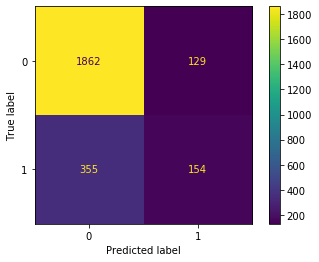

In [68]:
conf_matrix_plot(gnb_scaled, x_test, y_test)

All of our model metrics can be derived from the confusion matrix, and each metric tells its own part of the story. What stands out most in the confusion matrix is that the model misses a lot of customers who will churn. In other words, there are a lot of false negatives&mdash;355, to be exact. This is why our recall score is only 0.303. 